In [54]:
#imports
import pandas as pd
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import scipy.stats as st
import quandl
#from quandl_apitoken import api_key
from pycoingecko import CoinGeckoAPI

In [55]:
#pull list of coins from coingecko
cg = CoinGeckoAPI()
cg.get_coins_list()

[{'id': '01coin', 'symbol': 'zoc', 'name': '01coin'},
 {'id': '0-5x-long-algorand-token',
  'symbol': 'algohalf',
  'name': '0.5X Long Algorand Token'},
 {'id': '0-5x-long-altcoin-index-token',
  'symbol': 'althalf',
  'name': '0.5X Long Altcoin Index Token'},
 {'id': '0-5x-long-balancer-token',
  'symbol': 'balhalf',
  'name': '0.5X Long Balancer Token'},
 {'id': '0-5x-long-bitcoin-cash-token',
  'symbol': 'bchhalf',
  'name': '0.5X Long Bitcoin Cash Token'},
 {'id': '0-5x-long-bitcoin-sv-token',
  'symbol': 'bsvhalf',
  'name': '0.5X Long Bitcoin SV Token'},
 {'id': '0-5x-long-bitcoin-token',
  'symbol': 'half',
  'name': '0.5X Long Bitcoin Token'},
 {'id': '0-5x-long-cardano-token',
  'symbol': 'adahalf',
  'name': '0.5X Long Cardano Token'},
 {'id': '0-5x-long-chainlink-token',
  'symbol': 'linkhalf',
  'name': '0.5X Long Chainlink Token'},
 {'id': '0-5x-long-cosmos-token',
  'symbol': 'atomhalf',
  'name': '0.5X Long Cosmos Token'},
 {'id': '0-5x-long-defi-index-token',
  'symbol'

In [56]:
cg.get_coin_by_id("bitcoin")

{'id': 'bitcoin',
 'symbol': 'btc',
 'name': 'Bitcoin',
 'asset_platform_id': None,
 'platforms': {'': ''},
 'block_time_in_minutes': 10,
 'hashing_algorithm': 'SHA-256',
 'categories': ['Cryptocurrency'],
 'public_notice': None,
 'additional_notices': [],
 'localization': {'en': 'Bitcoin',
  'de': 'Bitcoin',
  'es': 'Bitcoin',
  'fr': 'Bitcoin',
  'it': 'Bitcoin',
  'pl': 'Bitcoin',
  'ro': 'Bitcoin',
  'hu': 'Bitcoin',
  'nl': 'Bitcoin',
  'pt': 'Bitcoin',
  'sv': 'Bitcoin',
  'vi': 'Bitcoin',
  'tr': 'Bitcoin',
  'ru': 'биткоин',
  'ja': 'ビットコイン',
  'zh': '比特币',
  'zh-tw': '比特幣',
  'ko': '비트코인',
  'ar': 'بيتكوين',
  'th': 'บิตคอยน์',
  'id': 'Bitcoin'},
 'description': {'en': 'Bitcoin is the first successful internet money based on peer-to-peer technology; whereby no central bank or authority is involved in the transaction and production of the Bitcoin currency. It was created by an anonymous individual/group under the name, Satoshi Nakamoto. The source code is available publicly as

In [57]:
gecko_list = [
    "bitcoin",
    "ethereum",
    "ripple",  # xrp
    "enjincoin",
    "bitcoin-cash",
    "cardano",
    "solana",
    "litecoin",
    "chainlink",
    "binancecoin",
    "eos",
    "tron",
]

In [58]:
timePeriod = 2190

data = {}
for coin in gecko_list:
    try:
        nested_lists = cg.get_coin_market_chart_by_id(
            id=coin, vs_currency="usd", days=timePeriod
        )["prices"]
        data[coin] = {}
        data[coin]["timestamps"], data[coin]["values"] = zip(*nested_lists)

    except Exception as e:
        print(e)
        print("coin: " + coin)

frame_list = [
    pd.DataFrame(data[coin]["values"], index=data[coin]["timestamps"], columns=[coin])
    for coin in gecko_list
    if coin in data
]


In [59]:
crypto_df = pd.concat(frame_list, axis = 1).sort_index()
crypto_df

,bitcoin,ethereum,ripple,enjincoin,bitcoin-cash,cardano,solana,litecoin,chainlink,binancecoin,eos,tron
1449532800000,412.930,0.818853,0.006677,NaN,NaN,NaN,NaN,3.691535,NaN,NaN,NaN,NaN
1449619200000,417.368,0.791829,0.008490,NaN,NaN,NaN,NaN,3.653237,NaN,NaN,NaN,NaN
1449705600000,416.910,0.847442,0.008549,NaN,NaN,NaN,NaN,3.633663,NaN,NaN,NaN,NaN
1449792000000,452.415,0.916739,0.008445,NaN,NaN,NaN,NaN,3.816128,NaN,NaN,NaN,NaN
1449878400000,434.903,0.971258,0.008466,NaN,NaN,NaN,NaN,3.587035,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1638717421000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.963006,NaN
1638717466000,NaN,4107.439450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1638717474000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.066657,NaN,NaN,NaN
1638717496000,NaN,NaN,NaN,NaN,NaN,NaN,187.386184,NaN,NaN,NaN,NaN,NaN


In [60]:
crypto_df["datetime"] = pd.to_datetime(crypto_df.index, unit="ms")
crypto_df["date"] = crypto_df["datetime"].dt.date
crypto_df["hour"] = crypto_df["datetime"].dt.hour
crypto_df

,bitcoin,ethereum,ripple,enjincoin,bitcoin-cash,cardano,solana,litecoin,chainlink,binancecoin,eos,tron,datetime,date,hour
1449532800000,412.930,0.818853,0.006677,NaN,NaN,NaN,NaN,3.691535,NaN,NaN,NaN,NaN,2015-12-08 00:00:00,2015-12-08,0
1449619200000,417.368,0.791829,0.008490,NaN,NaN,NaN,NaN,3.653237,NaN,NaN,NaN,NaN,2015-12-09 00:00:00,2015-12-09,0
1449705600000,416.910,0.847442,0.008549,NaN,NaN,NaN,NaN,3.633663,NaN,NaN,NaN,NaN,2015-12-10 00:00:00,2015-12-10,0
1449792000000,452.415,0.916739,0.008445,NaN,NaN,NaN,NaN,3.816128,NaN,NaN,NaN,NaN,2015-12-11 00:00:00,2015-12-11,0
1449878400000,434.903,0.971258,0.008466,NaN,NaN,NaN,NaN,3.587035,NaN,NaN,NaN,NaN,2015-12-12 00:00:00,2015-12-12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638717421000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.963006,NaN,2021-12-05 15:17:01,2021-12-05,15
1638717466000,NaN,4107.439450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-05 15:17:46,2021-12-05,15
1638717474000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.066657,NaN,NaN,NaN,2021-12-05 15:17:54,2021-12-05,15
1638717496000,NaN,NaN,NaN,NaN,NaN,NaN,187.386184,NaN,NaN,NaN,NaN,NaN,2021-12-05 15:18:16,2021-12-05,15


In [61]:
crypto_df = crypto_df.melt(
    id_vars=["datetime", "date", "hour"], var_name="currency_name"#, ignore_index=True
)
crypto_df.tail()

,datetime,date,hour,currency_name,value
26683,2021-12-05 15:17:01,2021-12-05,15,tron,NaN
26684,2021-12-05 15:17:46,2021-12-05,15,tron,NaN
26685,2021-12-05 15:17:54,2021-12-05,15,tron,NaN
26686,2021-12-05 15:18:16,2021-12-05,15,tron,NaN
26687,2021-12-05 15:18:18,2021-12-05,15,tron,NaN


In [62]:
crypto_df['hour'].dtypes

dtype('int64')

In [63]:
#crypto_df.replace("Nan":np.nan).dropna()
crypto_df.drop(crypto_df.columns[[0]], axis=1, inplace=True)
crypto_df.tail()

,date,hour,currency_name,value
26683,2021-12-05,15,tron,NaN
26684,2021-12-05,15,tron,NaN
26685,2021-12-05,15,tron,NaN
26686,2021-12-05,15,tron,NaN
26687,2021-12-05,15,tron,NaN


In [64]:
#crypto_df.reset_index(inplace=True)

In [65]:
is_enj =  crypto_df['currency_name']=="enjincoin"
print(is_enj.head())

0    False
1    False
2    False
3    False
4    False
Name: currency_name, dtype: bool


In [66]:
enj_df = crypto_df[is_enj]
enj_df.head()

,date,hour,currency_name,value
6672,2015-12-08,0,enjincoin,NaN
6673,2015-12-09,0,enjincoin,NaN
6674,2015-12-10,0,enjincoin,NaN
6675,2015-12-11,0,enjincoin,NaN
6676,2015-12-12,0,enjincoin,NaN


In [67]:
#crypto_df.tail()

In [68]:
enj_df = enj_df.replace('NaN', np.nan)
#crypto_df.dropna()

In [69]:
enj_df = enj_df.dropna(subset=['value'])           # not in place version
#df.dropna(subset=['value'], inplace=True)  # in place version
enj_df.tail()

,date,hour,currency_name,value
8880,2021-12-02,0,enjincoin,3.533366
8881,2021-12-03,0,enjincoin,3.395922
8882,2021-12-04,0,enjincoin,3.109500
8883,2021-12-05,0,enjincoin,3.015773
8886,2021-12-05,15,enjincoin,2.747649


In [70]:
#crypto_hour = crypto_df.loc[(crypto_df["hour"] < "0")]
#cryto_hour.tail()
                                

In [71]:
is_hour =  enj_df['hour']== 0

In [72]:
enj_df = enj_df[is_hour]
enj_df.head()

,date,hour,currency_name,value
7377,2017-11-10,0,enjincoin,0.020559
7378,2017-11-11,0,enjincoin,0.021407
7379,2017-11-12,0,enjincoin,0.018660
7380,2017-11-13,0,enjincoin,0.023525
7381,2017-11-14,0,enjincoin,0.030036


In [73]:
#calc daily return on btc
enj_percent_return = []
previous_price = 5638.861481
for index , row in enj_df.iterrows():
    price_row = row["value"]
    daily_enj_return = (price_row - previous_price) / previous_price *100
    enj_percent_return.append(round(daily_enj_return, 2))
    previous_price = price_row
enj_df.insert(1,"ENJ_Dly_Pct_Return", enj_percent_return)

In [74]:
enj_df.head()

,date,ENJ_Dly_Pct_Return,hour,currency_name,value
7377,2017-11-10,-100.00,0,enjincoin,0.020559
7378,2017-11-11,4.12,0,enjincoin,0.021407
7379,2017-11-12,-12.83,0,enjincoin,0.018660
7380,2017-11-13,26.07,0,enjincoin,0.023525
7381,2017-11-14,27.68,0,enjincoin,0.030036


In [75]:
enj_df['ENJ_Dly_MA'] = enj_df.rolling(5).mean()['ENJ_Dly_Pct_Return']
enj_df.tail()

,date,ENJ_Dly_Pct_Return,hour,currency_name,value,ENJ_Dly_MA
8879,2021-12-01,-4.74,0,enjincoin,3.494760,-3.680
8880,2021-12-02,1.10,0,enjincoin,3.533366,-1.572
8881,2021-12-03,-3.89,0,enjincoin,3.395922,-1.394
8882,2021-12-04,-8.43,0,enjincoin,3.109500,-3.946
8883,2021-12-05,-3.01,0,enjincoin,3.015773,-3.794


In [76]:
enj_df.head()

,date,ENJ_Dly_Pct_Return,hour,currency_name,value,ENJ_Dly_MA
7377,2017-11-10,-100.00,0,enjincoin,0.020559,NaN
7378,2017-11-11,4.12,0,enjincoin,0.021407,NaN
7379,2017-11-12,-12.83,0,enjincoin,0.018660,NaN
7380,2017-11-13,26.07,0,enjincoin,0.023525,NaN
7381,2017-11-14,27.68,0,enjincoin,0.030036,-10.992


In [77]:
#btc_df['value'].dtypes
is_ethereum =  crypto_df['currency_name']=="ethereum"
print(is_ethereum.head())

0    False
1    False
2    False
3    False
4    False
Name: currency_name, dtype: bool


In [78]:
ethereum_df = crypto_df[is_ethereum]
ethereum_df.head()

,date,hour,currency_name,value
2224,2015-12-08,0,ethereum,0.818853
2225,2015-12-09,0,ethereum,0.791829
2226,2015-12-10,0,ethereum,0.847442
2227,2015-12-11,0,ethereum,0.916739
2228,2015-12-12,0,ethereum,0.971258


In [79]:
ethereum_df = ethereum_df.replace('NaN', np.nan)

In [80]:
ethereum_df = ethereum_df.dropna(subset=['value'])           # not in place version
#df.dropna(subset=['value'], inplace=True)  # in place version
ethereum_df.tail()

,date,hour,currency_name,value
4432,2021-12-02,0,ethereum,4589.610618
4433,2021-12-03,0,ethereum,4519.441028
4434,2021-12-04,0,ethereum,4240.155517
4435,2021-12-05,0,ethereum,4101.656792
4444,2021-12-05,15,ethereum,4107.439450


In [81]:
is_hour_eth =  ethereum_df['hour']== 0
ethereum_df = ethereum_df[is_hour_eth]
ethereum_df.tail()

,date,hour,currency_name,value
4431,2021-12-01,0,ethereum,4637.121617
4432,2021-12-02,0,ethereum,4589.610618
4433,2021-12-03,0,ethereum,4519.441028
4434,2021-12-04,0,ethereum,4240.155517
4435,2021-12-05,0,ethereum,4101.656792


In [82]:
ethereum_df.head()

,date,hour,currency_name,value
2224,2015-12-08,0,ethereum,0.818853
2225,2015-12-09,0,ethereum,0.791829
2226,2015-12-10,0,ethereum,0.847442
2227,2015-12-11,0,ethereum,0.916739
2228,2015-12-12,0,ethereum,0.971258


In [83]:
#calc daily return on enj
eth_percent_return = []
previous_price = 0.926803
for index , row in ethereum_df.iterrows():
    price_row = row["value"]
    daily_eth_return = (price_row - previous_price) / previous_price *100
    eth_percent_return.append(round(daily_eth_return, 2))
    previous_price = price_row
ethereum_df.insert(1,"ETH_Dly_Pct_Return", eth_percent_return)


In [84]:
ethereum_df.head()

,date,ETH_Dly_Pct_Return,hour,currency_name,value
2224,2015-12-08,-11.65,0,ethereum,0.818853
2225,2015-12-09,-3.30,0,ethereum,0.791829
2226,2015-12-10,7.02,0,ethereum,0.847442
2227,2015-12-11,8.18,0,ethereum,0.916739
2228,2015-12-12,5.95,0,ethereum,0.971258


In [85]:
ethereum_df['ETH_Dly_MA'] = ethereum_df.rolling(5).mean()['ETH_Dly_Pct_Return']
ethereum_df.tail()

,date,ETH_Dly_Pct_Return,hour,currency_name,value,ETH_Dly_MA
4431,2021-12-01,4.33,0,ethereum,4637.121617,0.700
4432,2021-12-02,-1.02,0,ethereum,4589.610618,2.566
4433,2021-12-03,-1.53,0,ethereum,4519.441028,2.084
4434,2021-12-04,-6.18,0,ethereum,4240.155517,-0.160
4435,2021-12-05,-3.27,0,ethereum,4101.656792,-1.534


In [86]:
ethereum_df.head(8)

,date,ETH_Dly_Pct_Return,hour,currency_name,value,ETH_Dly_MA
2224,2015-12-08,-11.65,0,ethereum,0.818853,NaN
2225,2015-12-09,-3.30,0,ethereum,0.791829,NaN
2226,2015-12-10,7.02,0,ethereum,0.847442,NaN
2227,2015-12-11,8.18,0,ethereum,0.916739,NaN
2228,2015-12-12,5.95,0,ethereum,0.971258,1.240
2229,2015-12-13,-1.33,0,ethereum,0.958303,3.304
2230,2015-12-14,3.88,0,ethereum,0.995490,4.740
2231,2015-12-15,2.17,0,ethereum,1.017064,3.770


In [87]:
#btc_enj_df = pd.merge(btc_df, enjin_df, on=["date"])
#btc_enj_df.head()

In [88]:
#btc_enj_df_corr = st.pearsonr(btc_df["BTC_Dly_MA"],enjin_df["ENJ_Dly_MA"])[0]
#print(btc_enj_df_corr)

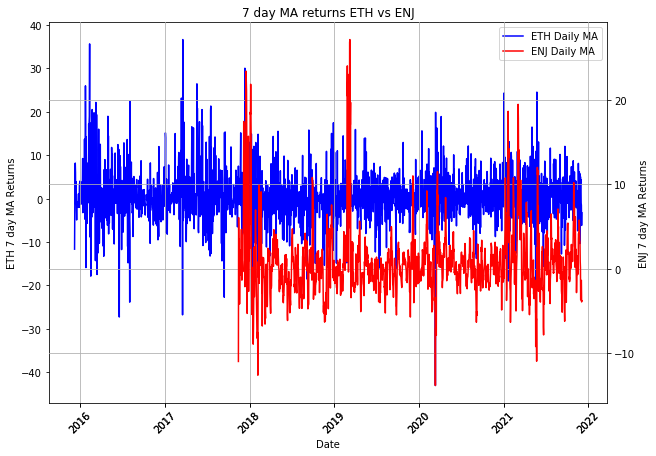

In [89]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(ethereum_df['date'], ethereum_df['ETH_Dly_Pct_Return'], "b-")
plt.xticks(rotation = 45)
plt.ylabel("ETH 7 day MA Returns")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2= ax2.plot(enj_df['date'],enj_df['ENJ_Dly_MA'], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("ENJ 7 day MA Returns")

# ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
# line3= ax2.plot(CGr_filter_df['Date'],CGr_filter_df['rolling_std'], "g-")
# ax2.yaxis.tick_right()
# ax2.yaxis.set_label_position("right")
# plt.xticks(rotation=45)
# plt.ylabel("Copper Gold daily Chg")

ax1.legend((line1+line2), ("ETH Daily MA", "ENJ Daily MA", "GoldCopp Rolling Std"), loc=0)
# ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Daily Chg MA"), loc=0)
plt.title("7 day MA returns ETH vs ENJ")
plt.xlabel("Date")
plt.grid(alpha=1)
# fig1.savefig("Jan 2017 to Pres. vs Gold Copper daily ret metrics")
plt.show()

In [90]:
enj_df.dropna(inplace=True)
enj_df.tail()

,date,ENJ_Dly_Pct_Return,hour,currency_name,value,ENJ_Dly_MA
8879,2021-12-01,-4.74,0,enjincoin,3.494760,-3.680
8880,2021-12-02,1.10,0,enjincoin,3.533366,-1.572
8881,2021-12-03,-3.89,0,enjincoin,3.395922,-1.394
8882,2021-12-04,-8.43,0,enjincoin,3.109500,-3.946
8883,2021-12-05,-3.01,0,enjincoin,3.015773,-3.794


In [91]:
ethereum_df.dropna(inplace=True)
ethereum_df.head()

,date,ETH_Dly_Pct_Return,hour,currency_name,value,ETH_Dly_MA
2228,2015-12-12,5.95,0,ethereum,0.971258,1.240
2229,2015-12-13,-1.33,0,ethereum,0.958303,3.304
2230,2015-12-14,3.88,0,ethereum,0.995490,4.740
2231,2015-12-15,2.17,0,ethereum,1.017064,3.770
2232,2015-12-16,-2.77,0,ethereum,0.988912,1.580


In [92]:
enj_eth_df = pd.merge(enj_df, ethereum_df, on=["date"])
enj_eth_df.head()

,date,ENJ_Dly_Pct_Return,hour_x,currency_name_x,value_x,ENJ_Dly_MA,ETH_Dly_Pct_Return,hour_y,currency_name_y,value_y,ETH_Dly_MA
0,2017-11-14,27.68,0,enjincoin,0.030036,-10.992,7.48,0,ethereum,338.937627,1.126
1,2017-11-15,-14.86,0,enjincoin,0.025571,6.036,-1.37,0,ethereum,334.286933,2.154
2,2017-11-16,-14.08,0,enjincoin,0.021972,2.396,-1.28,0,ethereum,330.021316,0.908
3,2017-11-17,-7.37,0,enjincoin,0.020351,3.488,1.01,0,ethereum,333.351255,1.242
4,2017-11-18,14.83,0,enjincoin,0.023369,1.240,4.62,0,ethereum,348.747215,2.092


In [93]:
# Rolling Correlation
Rolling_window = 7
Rolling_correl =7
no_of_std = 2
correl = enj_eth_df['ETH_Dly_MA'].rolling(window=Rolling_window).corr(enj_eth_df['ENJ_Dly_MA'])
correl_mean = correl.rolling(window=Rolling_correl).mean()
# print(correl_mean)
# Standard Deviation from mean
std_correl = correl.rolling(window=Rolling_correl).std()
# Upper and lower bounds for correl
upper_correl = correl_mean + (std_correl * no_of_std )
lower_correl = correl_mean - (std_correl * no_of_std )
# correl.tail()
upper_correl.tail(10)

1473    1.060284
1474    0.964196
1475    1.032840
1476    1.063102
1477    1.138810
1478    1.357843
1479    1.209908
1480    1.061925
1481    0.769559
1482    0.740134
dtype: float64

In [94]:
correl_mean.tail(10)

1473    0.688935
1474    0.732418
1475    0.706507
1476    0.651540
1477    0.540078
1478    0.322695
1479    0.115097
1480   -0.061233
1481   -0.163379
1482   -0.171150
dtype: float64

In [95]:
#compile summary data for signals

summary_df = pd.DataFrame({'date': enj_eth_df['date'],
                                      'dly_chg_correlation': correl,
                                      'dly_chg_corr_mean': correl_mean,
                                      'Std_daily_chg_correl':std_correl,
                                      'upper_correl': upper_correl,
                                      'lower_correl':lower_correl})
summary_df.head()

,date,dly_chg_correlation,dly_chg_corr_mean,Std_daily_chg_correl,upper_correl,lower_correl
0,2017-11-14,NaN,NaN,NaN,NaN,NaN
1,2017-11-15,NaN,NaN,NaN,NaN,NaN
2,2017-11-16,NaN,NaN,NaN,NaN,NaN
3,2017-11-17,NaN,NaN,NaN,NaN,NaN
4,2017-11-18,NaN,NaN,NaN,NaN,NaN


In [96]:
#signal showing point above below 2std and setting rest to 0
def my_signal(row):
    if row['dly_chg_correlation']> row ['upper_correl']:
        return row['dly_chg_correlation'] - row['upper_correl']
    elif row['dly_chg_correlation'] < row['lower_correl']:
        return row['dly_chg_correlation'] - row['lower_correl']
    else:
        return 0
    
summary_df['signal'] = summary_df.apply(my_signal, axis=1)
summary_df.tail(5)    


,date,dly_chg_correlation,dly_chg_corr_mean,Std_daily_chg_correl,upper_correl,lower_correl,signal
1478,2021-12-01,-0.680900,0.322695,0.517574,1.357843,-0.712453,0.0
1479,2021-12-02,-0.573284,0.115097,0.547406,1.209908,-0.979714,0.0
1480,2021-12-03,-0.628423,-0.061233,0.561579,1.061925,-1.184390,0.0
1481,2021-12-04,-0.059579,-0.163379,0.466469,0.769559,-1.096317,0.0
1482,2021-12-05,0.356162,-0.171150,0.455642,0.740134,-1.082434,0.0


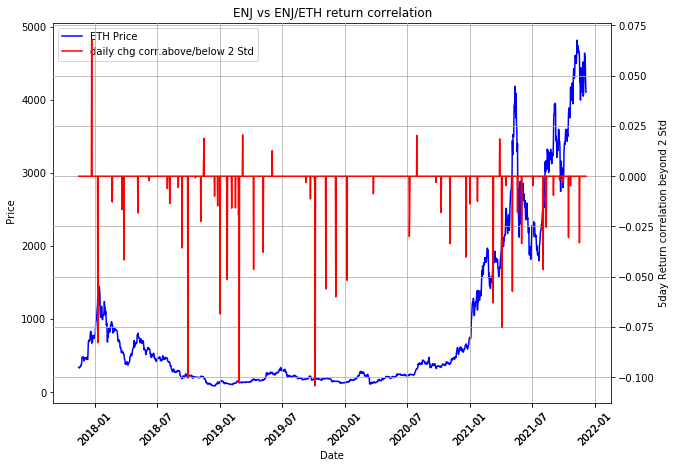

In [97]:
#plot signal chart

fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(enj_eth_df['date'], enj_eth_df['value_y'], "b-")
plt.xticks(rotation = 45)
plt.ylabel(" Price")

# ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
# line2= ax2.plot(summary3_df['Date'],summary3_df['MA'], "r-")
# ax2.yaxis.tick_right()
# ax2.yaxis.set_label_position("right")
# plt.xticks(rotation=45)
# plt.ylabel("daily Chg")

# ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
# line3= ax2.plot(copp_gold_covid_df['Date'],copp_gold_covid_df['rolling_std'], "g-")
# ax2.yaxis.tick_right()
# ax2.yaxis.set_label_position("right")
# plt.xticks(rotation=45)
# plt.ylabel("Copper Gold daily Chg")

# ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
# line4= ax2.plot(summary3_df['Date'],summary3_df['SP_MA'], "y-")
# ax2.yaxis.tick_right()
# ax2.yaxis.set_label_position("right")
# plt.xticks(rotation=45)
# plt.ylabel("daily Chg")



# ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
# line5= ax2.plot(summary3_df['Date'],summary3_df['upper_correl'], "m-")
# ax2.yaxis.tick_right()
# ax2.yaxis.set_label_position("right")
# plt.xticks(rotation=45)
# plt.ylabel("daily Chg")


# ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
# line6= ax2.plot(summary3_df['Date'],summary3_df['lower_correl'], "m-")
# ax2.yaxis.tick_right()
# ax2.yaxis.set_label_position("right")
# plt.xticks(rotation=45)
# plt.ylabel("daily Chg")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2= ax2.plot(summary_df['date'],summary_df['signal'], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("5day Return correlation beyond 2 Std")


ax1.legend((line1+line2), ("ETH Price", "daily chg corr.above/below 2 Std"), loc=0)
# ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Daily Chg MA"), loc=0)
plt.title("ENJ vs ENJ/ETH return correlation")
plt.xlabel("Date")
plt.grid(alpha=1)
#fig1.savefig("BTC/ENJ ret corr signal 7 day ret 30 day corr window")



plt.show()

In [46]:
#btc_enj_df['date'].dtypes

In [47]:
#pd.to_datetime(btc_enj_df['date'], format='%Y/%m/%d')

In [48]:
enj_eth_df['date']= pd.to_datetime(enj_eth_df['date'])

In [49]:
enj_eth_df['date'].dtypes

dtype('<M8[ns]')

In [50]:
summary_df['date']= pd.to_datetime(summary_df['date'])
summary_df['date'].dtypes

dtype('<M8[ns]')

In [51]:
enj_eth_dates_df = enj_eth_df.loc[(enj_eth_df["date"] >= "2019-06-01") & 
                                   (enj_eth_df["date"] <= "2020-11-17")]

enj_eth_dates_df.head()

,date,ENJ_Dly_Pct_Return,hour_x,currency_name_x,value_x,ENJ_Dly_MA,ETH_Dly_Pct_Return,hour_y,currency_name_y,value_y,ETH_Dly_MA
564,2019-06-01,3.72,0,enjincoin,0.156657,-0.340,4.99,0,ethereum,268.126039,0.208
565,2019-06-02,-2.51,0,enjincoin,0.152717,-1.016,-1.27,0,ethereum,264.727324,-0.594
566,2019-06-03,10.35,0,enjincoin,0.168516,0.504,1.97,0,ethereum,269.938829,-0.040
567,2019-06-04,-9.20,0,enjincoin,0.153010,-1.136,-6.74,0,ethereum,251.752575,-1.208
568,2019-06-05,-7.05,0,enjincoin,0.142228,-0.938,-4.57,0,ethereum,240.239434,-1.124


In [52]:
summary_dates_df = summary_df.loc[(summary_df["date"] >= "2019-06-01") & 
                                   (summary_df["date"] <= "2020-11-17")]

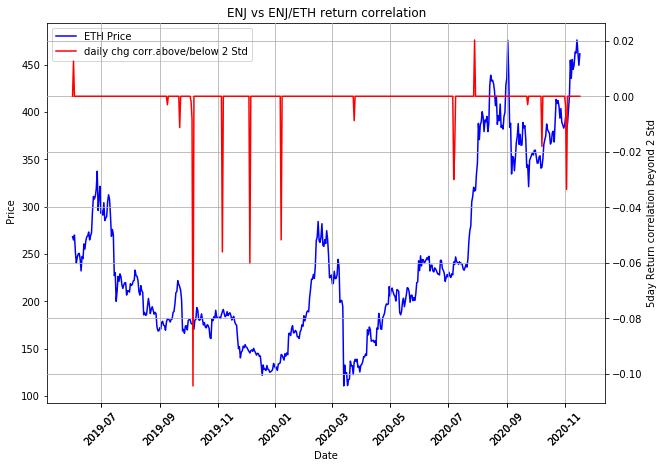

In [53]:
#plot signal chart

fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(enj_eth_dates_df['date'], enj_eth_dates_df['value_y'], "b-")
plt.xticks(rotation = 45)
plt.ylabel(" Price")

# ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
# line2= ax2.plot(summary3_df['Date'],summary3_df['MA'], "r-")
# ax2.yaxis.tick_right()
# ax2.yaxis.set_label_position("right")
# plt.xticks(rotation=45)
# plt.ylabel("daily Chg")

# ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
# line3= ax2.plot(copp_gold_covid_df['Date'],copp_gold_covid_df['rolling_std'], "g-")
# ax2.yaxis.tick_right()
# ax2.yaxis.set_label_position("right")
# plt.xticks(rotation=45)
# plt.ylabel("Copper Gold daily Chg")

# ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
# line4= ax2.plot(summary3_df['Date'],summary3_df['SP_MA'], "y-")
# ax2.yaxis.tick_right()
# ax2.yaxis.set_label_position("right")
# plt.xticks(rotation=45)
# plt.ylabel("daily Chg")



# ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
# line5= ax2.plot(summary3_df['Date'],summary3_df['upper_correl'], "m-")
# ax2.yaxis.tick_right()
# ax2.yaxis.set_label_position("right")
# plt.xticks(rotation=45)
# plt.ylabel("daily Chg")


# ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
# line6= ax2.plot(summary3_df['Date'],summary3_df['lower_correl'], "m-")
# ax2.yaxis.tick_right()
# ax2.yaxis.set_label_position("right")
# plt.xticks(rotation=45)
# plt.ylabel("daily Chg")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2= ax2.plot(summary_dates_df['date'],summary_dates_df['signal'], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("5day Return correlation beyond 2 Std")


ax1.legend((line1+line2), ("ETH Price", "daily chg corr.above/below 2 Std"), loc=0)
# ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Daily Chg MA"), loc=0)
plt.title("ENJ vs ENJ/ETH return correlation")
plt.xlabel("Date")
plt.grid(alpha=1)
#fig1.savefig("BTC/ENJ ret corr signal 7 day ret 30 day corr window")



plt.show()

In [48]:
btc_enj_cor = st.pearsonr(btc_enj_df["ENJ_Dly_MA"],btc_enj_df["BTC_Dly_MA"])[0]
print(btc_enj_cor)

0.40223574729400163


In [15]:
#btc_df.to_csv("cryptodates.csv")